### Importing Packages and Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv("./titanic_toy.csv")

In [14]:
data.sample(5)

,Age,Fare,Family,Survived
869,4.0,11.1333,2,1
820,52.0,93.5000,2,1
763,36.0,NaN,3,1
615,24.0,65.0000,3,1
446,13.0,19.5000,1,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
data.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

### Mean Median Imputation (Using Pandas)

In [5]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [23]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [24]:
age_mean = X_train["Age"].mean()
age_median = X_train["Age"].median()

fare_mean = X_train["Fare"].mean()
fare_median = X_train["Fare"].median()

In [25]:
X_train['age_mean'] = X_train['Age'].fillna(age_mean)
X_train['age_median'] = X_train['Age'].fillna(age_median)

X_train['fare_mean'] = X_train['Fare'].fillna(fare_mean)
X_train['fare_median'] = X_train['Fare'].fillna(fare_median)

In [32]:
X_train.sample(5)

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
241,NaN,15.5000,1,29.785904,28.75,15.5000,15.5000
51,21.0,7.8000,0,21.000000,21.00,7.8000,7.8000
685,25.0,41.5792,3,25.000000,25.00,41.5792,41.5792
132,47.0,14.5000,1,47.000000,47.00,14.5000,14.5000
616,34.0,14.4000,2,34.000000,34.00,14.4000,14.4000


In [34]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['age_median'].var())
print('Age Variance after mean imputation: ', X_train['age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


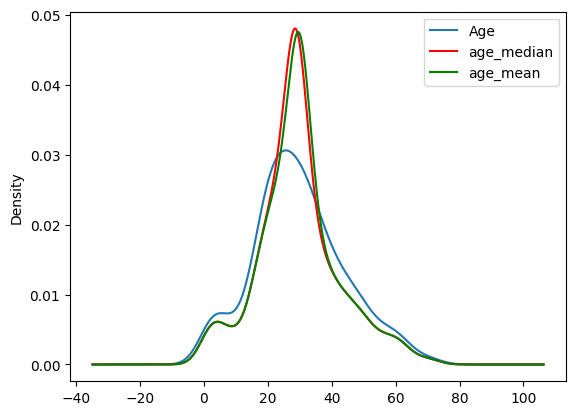

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)

X_train['age_median'].plot(kind='kde', ax=ax, color='red')

X_train['age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

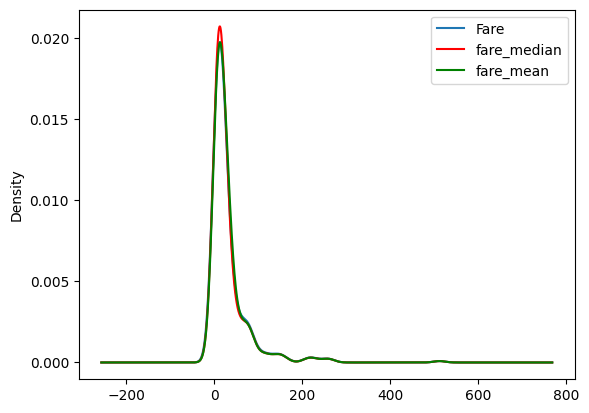

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)

X_train['fare_median'].plot(kind='kde', ax=ax, color='red')

X_train['fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [38]:
X_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [39]:
X_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

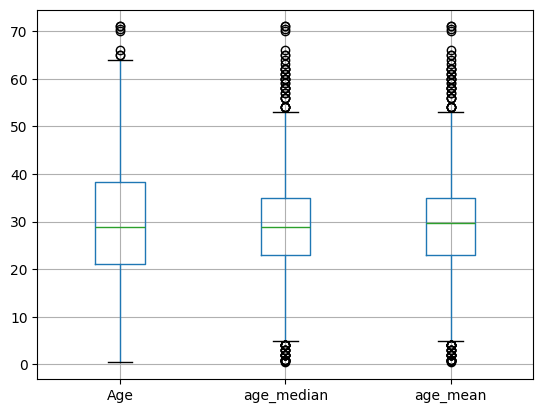

In [41]:
X_train[['Age', 'age_median', 'age_mean']].boxplot()

<Axes: >

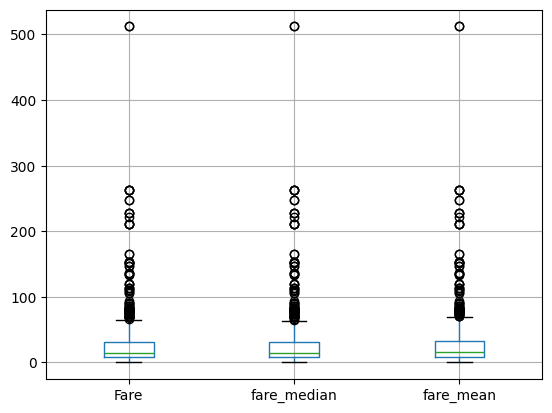

In [42]:
X_train[['Fare', 'fare_median', 'fare_mean']].boxplot()

### Mean Median Imputation (Using SkLearn)

In [57]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [44]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [49]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [51]:
trf.fit(X_train)

c:\Users\Muhammad Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [52]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [54]:
trf.named_transformers_['imputer2'].statistics_

array([14.4583])

In [55]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [56]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]], shape=(712, 3))

### Arbitrary Value Imputation (Using Pandas)

In [58]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [60]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [62]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 imputation:  951.7275570187188
Age Variance after -1 imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 imputation:  47219.202652176304
Fare Variance after -1 imputation:  2378.5676784883494


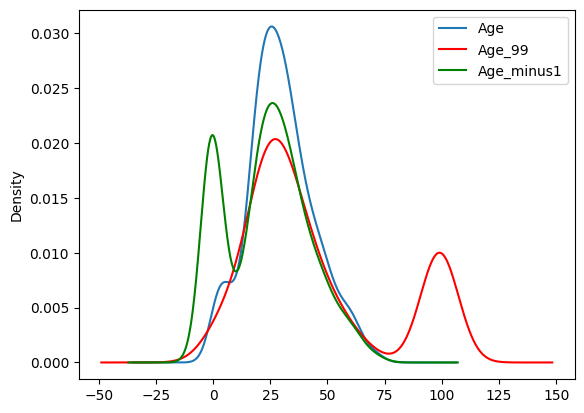

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

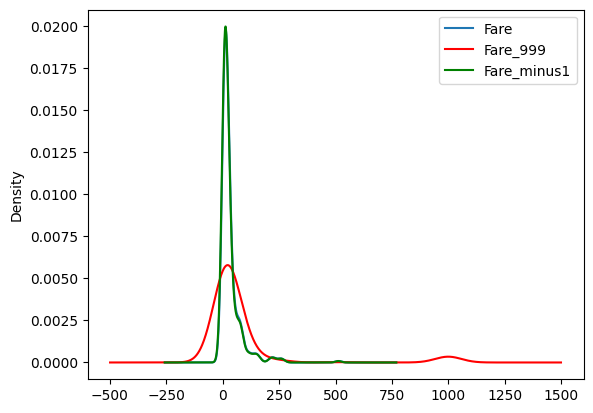

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [65]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [66]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


### Arbitrary Value Imputation

In [67]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [69]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [70]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [71]:
trf.fit(X_train)

c:\Users\Muhammad Abdullah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [72]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [73]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [74]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [75]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]], shape=(712, 3))